In [1]:
import pickle
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

In [2]:
# Load in X test sets
def load_inputs():
    X_test_color = pickle.load(open('E:/testing_color.pkl', "rb"))
    X_test_depth = pickle.load(open('E:/testing_depth.pkl', "rb"))
    X_test_icub_left = pickle.load(open('E:/testing_icub_left.pkl', "rb"))
    X_test_icub_right = pickle.load(open('E:/testing_icub_right.pkl', "rb"))
    X_valid_color = pickle.load(open('E:/validation_color.pkl', "rb"))
    X_valid_depth = pickle.load(open('E:/validation_depth.pkl', "rb"))
    X_valid_icub_left = pickle.load(open('E:/validation_icub_left.pkl', "rb"))
    X_valid_icub_right = pickle.load(open('E:/validation_icub_right.pkl', "rb"))
    return X_test_color, X_test_depth, X_test_icub_left, X_test_icub_right, X_valid_color, X_valid_depth, X_valid_icub_left, X_valid_icub_right

# Function to load y values
def load_outputs():
    y_test = pickle.load(open('E:/y_testing.pkl', "rb"))
    y_valid = pickle.load(open('E:/y_validation.pkl', "rb"))
    return y_test, y_valid

# Function to reshape data
def reshape_input_vect(vect, size=(128, 64, 3)):
    inp_vect = []
    for i in range(vect.shape[0]):
        inp_vect.append(np.reshape(vect[i], (128, 64, 3)))
    return np.asarray(inp_vect)

# Load in X data
X_test_color, X_test_depth, X_test_icub_left, X_test_icub_right, X_valid_color, X_valid_depth, X_valid_icub_left, X_valid_icub_right = load_inputs()
print(X_test_color.shape, X_test_depth.shape, X_test_icub_left.shape, X_test_icub_right.shape)

# Load in y data
y_test, y_valid = load_outputs()
print(y_test.shape)

# To categorical y-values [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
y_test = to_categorical(y_test, num_classes = None, dtype='float32')
y_valid = to_categorical(y_valid, num_classes = None, dtype='float32')

print(y_valid.shape)

(640, 24576) (640, 24576) (640, 24576) (640, 24576)
(640,)
(640, 4)


In [3]:
# Reshape data
X_test_color, X_test_depth, X_test_icub_left, X_test_icub_right = reshape_input_vect(X_test_color), reshape_input_vect(X_test_depth), reshape_input_vect(X_test_icub_left), reshape_input_vect(X_test_icub_right)
X_valid_color, X_valid_depth, X_valid_icub_left, X_valid_icub_right = reshape_input_vect(X_valid_color), reshape_input_vect(X_valid_depth), reshape_input_vect(X_valid_icub_left), reshape_input_vect(X_valid_icub_right)

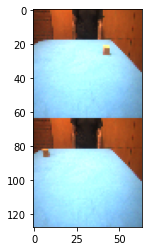

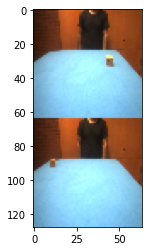

In [4]:
# Show first validation image
plt.imshow(X_test_icub_left[0])
plt.show()
    
plt.imshow(X_test_icub_right[0])
plt.show()

In [5]:
# Import best performing models for ensemble learning
color_model = tf.keras.models.load_model('CNN_2_color_model')
depth_model = tf.keras.models.load_model('CNN_1_depth_model')
icub_left_model = tf.keras.models.load_model('CNN_2_icub_left_model')
icub_right_model = tf.keras.models.load_model('CNN_2_icub_right_model')

In [7]:
# Predicting the output on test set
pred_1 = color_model.predict(X_valid_color)
pred_2 = depth_model.predict(X_valid_depth)
pred_3 = icub_left_model.predict(X_valid_icub_left)
pred_4 = icub_right_model.predict(X_valid_icub_right)

20/20 [==============================] - 0s 5ms/step


In [9]:
#pred_final = (pred_1*0.4) + (pred_2*0.05) + (pred_3*0.15) + (pred_4*0.4)
#pred_final = (pred_1*0.2529) + (pred_2*0.2433) + (pred_3*0.2517) + (pred_4*0.2521)
#pred_final = (pred_1 + pred_2 + pred_3 + pred_4 / 4)

In [9]:
y_true = np.argmax(y_valid, axis=-1)
categories = ['Left to right', "Pull", "Push", "Right to left"]

In [56]:
categories = ['Left to right', "Pull", "Push", "Right to left"]
y_true = np.argmax(y_valid, axis=-1)

weight_list = []
i = 0
while i < 10:
    a = np.random.dirichlet(np.ones(4),size=1)
    pred_final = (pred_1*a[0][0]) + (pred_2*a[0][1]) + (pred_3*a[0][2]) + (pred_4*a[0][3])
    y_pred = np.argmax(pred_final, axis=-1)
    if accuracy_score(y_true, y_pred) >= 0.99375:
        print("current values are:", a)
        print(accuracy_score(y_true, y_pred))
        weight_list.append(a)
        i += 1
    else:
        continue

current values are: [[0.28853196 0.13694216 0.19591301 0.37861287]]
0.99375
current values are: [[0.15484639 0.12633851 0.25880721 0.46000789]]
0.99375
current values are: [[0.15281053 0.2559518  0.10216867 0.489069  ]]
0.99375
current values are: [[0.44155022 0.01446687 0.31797431 0.2260086 ]]
0.99375
current values are: [[0.04526803 0.34262571 0.16503032 0.44707594]]
0.99375
current values are: [[0.27239877 0.09283665 0.44736544 0.18739914]]
0.99375
current values are: [[0.35803467 0.02699059 0.19148064 0.42349409]]
0.99375
current values are: [[0.32289792 0.00208209 0.4890945  0.18592549]]
0.99375
current values are: [[0.13850015 0.04363563 0.26897325 0.54889097]]
0.99375
current values are: [[0.45344711 0.01521472 0.45130249 0.08003567]]
0.99375


In [57]:
weight_list = np.asarray(weight_list)
weight_list = weight_list.reshape(10, 4)

weight_0 = []
weight_1 = []
weight_2 = []
weight_3 = []

for i in range(10):
    weight_0.append(weight_list[i][0])
    weight_1.append(weight_list[i][1])
    weight_2.append(weight_list[i][2])
    weight_3.append(weight_list[i][3])

weight_0 = np.asarray(weight_0)
weight_1 = np.asarray(weight_1)
weight_2 = np.asarray(weight_2)
weight_3 = np.asarray(weight_3)

weight_0 = weight_0.sum() / 10
weight_1 = weight_1.sum() / 10
weight_2 = weight_2.sum() / 10
weight_3 = weight_3.sum() / 10

print(round(weight_0, 4))
print(round(weight_1, 4))
print(round(weight_2, 4))
print(round(weight_3, 4))

print(round(weight_0, 4)+round(weight_1, 4)+round(weight_2, 4)+round(weight_3, 4))

0.2628
0.1057
0.2888
0.3427
1.0


In [10]:
pred_final = (pred_1*0.2628) + (pred_2*0.1057) + (pred_3*0.2888) + (pred_4*0.3427)

# Convert validation observations to one hot vectors
y_pred = np.argmax(pred_final, axis=-1)
print(accuracy_score(y_true, y_pred))

0.99375


In [11]:
# Print Classification report
print(classification_report(y_true, y_pred, target_names=categories, digits=4))

               precision    recall  f1-score   support

Left to right     0.9756    1.0000    0.9877       160
         Pull     1.0000    0.9875    0.9937       160
         Push     1.0000    0.9875    0.9937       160
Right to left     1.0000    1.0000    1.0000       160

     accuracy                         0.9938       640
    macro avg     0.9939    0.9938    0.9938       640
 weighted avg     0.9939    0.9938    0.9938       640



In [12]:
# Predicting the output on test set
pred_1 = color_model.predict(X_test_color)
pred_2 = depth_model.predict(X_test_depth)
pred_3 = icub_left_model.predict(X_test_icub_left)
pred_4 = icub_right_model.predict(X_test_icub_right)

pred_final = (pred_1*0.2628) + (pred_2*0.1057) + (pred_3*0.2888) + (pred_4*0.3427)

# Convert validation observations to one hot vectors
y_pred = np.argmax(pred_final, axis=-1)
print(accuracy_score(y_true, y_pred))

# Print Classification report
print(classification_report(y_true, y_pred, target_names=categories, digits=4))

20/20 [==============================] - 0s 5ms/step
0.990625
               precision    recall  f1-score   support

Left to right     0.9815    0.9938    0.9876       160
         Pull     0.9875    0.9875    0.9875       160
         Push     1.0000    0.9875    0.9937       160
Right to left     0.9938    0.9938    0.9938       160

     accuracy                         0.9906       640
    macro avg     0.9907    0.9906    0.9906       640
 weighted avg     0.9907    0.9906    0.9906       640



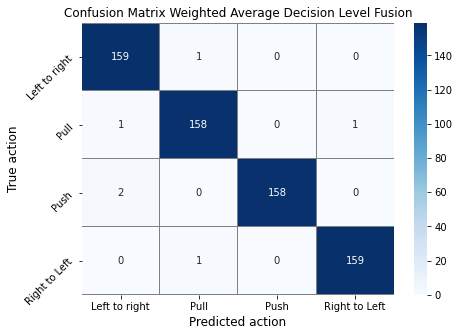

In [14]:
# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred) 
# Plot the confusion matrix
categories = ['Left to right', "Pull", "Push", "Right to Left"]
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues", linecolor="grey", fmt= 'g',ax=ax, xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted action", fontsize=12)
plt.ylabel("True action", fontsize=12)
plt.title("Confusion Matrix Weighted Average Decision Level Fusion")
locs, labels = plt.yticks()
plt.setp(labels, rotation=45)
plt.show()

In [ ]:
# Average ensemble: 0.9891
# Weighted average on validation set: 0.9937, on Test set: 0.9906
# Weighted average tuned on Test set: 0.9922

In [15]:
# Predicting the output on test set
pred_1 = color_model.predict(X_test_color)
pred_2 = depth_model.predict(X_test_depth)
pred_3 = icub_left_model.predict(X_test_icub_left)
pred_4 = icub_right_model.predict(X_test_icub_right)

pred_final = (pred_1*0.40) + (pred_2*0.05) + (pred_3*0.15) + (pred_4*0.4)

# Convert validation observations to one hot vectors
y_pred = np.argmax(pred_final, axis=-1)
print(accuracy_score(y_true, y_pred))

# Print Classification report
print(classification_report(y_true, y_pred, target_names=categories, digits=4))

20/20 [==============================] - 0s 5ms/step
0.9921875
               precision    recall  f1-score   support

Left to right     0.9815    0.9938    0.9876       160
         Pull     0.9876    0.9938    0.9907       160
         Push     1.0000    0.9875    0.9937       160
Right to Left     1.0000    0.9938    0.9969       160

     accuracy                         0.9922       640
    macro avg     0.9923    0.9922    0.9922       640
 weighted avg     0.9923    0.9922    0.9922       640



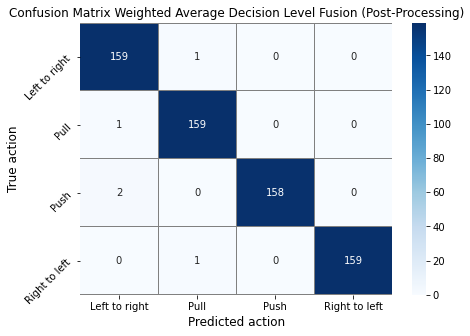

In [16]:
# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred) 
# Plot the confusion matrix
categories = ['Left to right', "Pull", "Push", "Right to left"]
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues", linecolor="grey", fmt= 'g',ax=ax, xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted action", fontsize=12)
plt.ylabel("True action", fontsize=12)
plt.title("Confusion Matrix Weighted Average Decision Level Fusion (Post-Processing)")
locs, labels = plt.yticks()
plt.setp(labels, rotation=45)
plt.show()